In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [8]:
df = pd.read_csv(r'file.txt')

In [9]:
df.head()

,5485
0,1 champion products ch approves stock split ch...
1,2 computer terminal systems cpml completes sal...
2,1 cobanco inc cbco year net shr cts vs dlrs ne...
3,1 am international inc am nd qtr jan oper shr ...
4,1 brown forman inc bfd th qtr net shr one dlr ...


In [10]:
df.shape

(5485, 1)

In [11]:
df.isnull().sum()

5485    0
dtype: int64

In [12]:
def get_label(text):
     for i in text:
            return int(i[0])

In [13]:
df['label'] = df['5485'].apply(lambda x: get_label(x))

In [14]:
df.head()

,5485,label
0,1 champion products ch approves stock split ch...,1
1,2 computer terminal systems cpml completes sal...,2
2,1 cobanco inc cbco year net shr cts vs dlrs ne...,1
3,1 am international inc am nd qtr jan oper shr ...,1
4,1 brown forman inc bfd th qtr net shr one dlr ...,1


In [15]:
df.columns = ('text', 'label')

In [16]:
df.head()

,text,label
0,1 champion products ch approves stock split ch...,1
1,2 computer terminal systems cpml completes sal...,2
2,1 cobanco inc cbco year net shr cts vs dlrs ne...,1
3,1 am international inc am nd qtr jan oper shr ...,1
4,1 brown forman inc bfd th qtr net shr one dlr ...,1


In [17]:
df['text']=df['text'].str[1:]

In [18]:
df.head()

,text,label
0,champion products ch approves stock split cha...,1
1,computer terminal systems cpml completes sale...,2
2,cobanco inc cbco year net shr cts vs dlrs net...,1
3,am international inc am nd qtr jan oper shr l...,1
4,brown forman inc bfd th qtr net shr one dlr v...,1


In [19]:
df.tail()

,text,label
5480,kelly oil and gas partners kly year dec shr c...,1
5481,japan seeks to strengthen paris currency acco...,8
5482,tcw convertible securities cvt sets dividend ...,1
5483,south korean won fixed at month high the bank...,8
5484,australian unions launch new south wales stri...,4


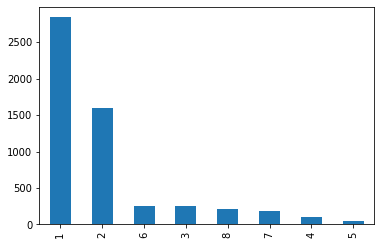

In [20]:
df.label.value_counts().plot(kind='bar')

In [21]:
#remove special characters and punctuation
df['text'] = df['text'].replace(r'[^A-Za-z0-9 ]+', '')

#remove single letters from text
df['text'] = df['text'].apply (lambda x: re.sub(r"((?<=^)|(?<= )).((?=$)|(?= ))", '', x).strip())

In [22]:
df.sample(10)

,text,label
4349,basf world group pre tax profit billion marks ...,1
656,nl industries inc nl sets qtrly payout qtrly d...,1
2287,usp real estate uspts has gain on sale usp rea...,1
2077,endotronics sees heavy losses in qtr from with...,1
4179,former herstatt dealer can be sued court rules...,8
2076,everest and jennings international eja th qtr ...,1
5278,douglas computer international year end shr se...,1
5230,boise cascade bcc completes sale of unit boise...,2
4963,new venezuela debt interest rate goes into eff...,7
5392,new bedford institution for savings nbbs year ...,1


In [23]:
vectorizer = CountVectorizer(stop_words='english')

In [24]:
X = df['text']
y = df['label']

In [25]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 88)

In [26]:
X_vect = vectorizer.fit_transform(X_train)

In [27]:
nb = MultinomialNB()

In [28]:
nb.fit(X_vect,y_train)

MultinomialNB()

In [29]:
y_pred = nb.predict(vectorizer.transform(X_test))

In [36]:
Accuracy = metrics.accuracy_score(y_test, y_pred) 


In [37]:
print(Accuracy)


0.9465370595382746
